In [2]:
######## Generate and save dataset binary
    # Generates the processed dataset used by all model v0 candidates
    # Generates train, val, and test splits
    # Saves generated train, val, and test datasets to disk for quick loading into memory

######## Preprocess final dataset if necessary
    # Scale datasets
    # Saves scaled datasets and scalers to disk

Import & Instantiate All Required Modules

In [32]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')


# === STEP 0: Imports
from modules.dataset_generator.helpers.configuration_loader import ConfigurationLoader as DSConfigLoader
from modules.dataset_generator.factories.data_io_factory import DataIOFactory
from modules.dataset_generator.factories.feature_processor_factory import FeatureProcessorFactory
from modules.dataset_generator.factories.join_factory import JoinFactory
from modules.dataset_generator.factories.strategy_factory import StrategyFactory
from modules.dataset_generator.dataset_generator import DatasetGenerator
from modules.processor.helpers.configuration_loader import ConfigurationLoader as PConfigLoader
from modules.processor.factories.split_strategy_factory import SplitStrategyFactory
from modules.processor.processor import Processor
from model_binaries.utils.binary_utils import save_entity, load_entity, assess_dataset_balance, scale_features

In [39]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === DATASET GEN
yaml_path = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
ds_configuration_loader = DSConfigLoader()
data_factory, feature_processor_factory, join_factory, strategy_factory = DataIOFactory(), FeatureProcessorFactory(), JoinFactory(), StrategyFactory()
## === PROCESSOR
p_configuration_loader = PConfigLoader()
split_strategy_factory = SplitStrategyFactory()

Create Dataset Generator & Generate Processed Dataset

In [34]:
# === STEP 2: DATASET GEN
dataset_generator = DatasetGenerator(yaml_path, ds_configuration_loader, data_factory, feature_processor_factory, join_factory, strategy_factory)

In [ ]:
processed_dataset = dataset_generator.generate()

Save/Load Processed Dataset to Disk

In [35]:
# File path to save and load the processed dataset
processed_dataset_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01"

In [12]:
## Use to save processed dataset to disk ## 
save_entity(processed_dataset_folder_path, "processed_dataset.pkl", processed_dataset)

In [36]:
## Use to load processed dataset if computed already ## 
processed_dataset = load_entity(processed_dataset_folder_path, "processed_dataset.pkl")

Processed Dataset Peek

In [37]:
processed_dataset.features

,A_player_1_MIN,A_player_1_PTS,A_player_1_AST,A_player_1_TO,A_player_1_PLUS_MINUS,A_player_1_OREB,A_player_1_DREB,A_player_1_PF,A_player_1_FG3_PCT,A_player_1_FG_PCT,...,B_player_8_TO,B_player_8_PLUS_MINUS,B_player_8_OREB,B_player_8_DREB,B_player_8_PF,B_player_8_FG3_PCT,B_player_8_FG_PCT,B_player_8_FT_PCT,final_score_A,final_score_B
GAME_ID,,,,,,,,,,,,,,,,,,,,,
11400001,41.266667,31.0,5.0,1.0,-16.0,1.0,9.0,1.0,0.333,0.476,...,0.0,-11.0,0.0,0.0,4.0,0.0,0.667,0.0,86.0,98.0
11400002,45.083333,18.0,6.0,2.0,2.0,0.0,2.0,2.0,0.500,0.417,...,2.0,7.0,1.0,10.0,1.0,0.0,0.444,0.0,99.0,94.0
11400004,42.566667,16.0,2.0,0.0,0.0,3.0,1.0,2.0,0.500,0.400,...,0.0,-4.0,0.0,0.0,2.0,0.0,0.667,0.0,81.0,85.0
11400005,36.275000,11.5,3.0,0.5,12.0,1.5,7.0,2.0,0.405,0.397,...,0.0,6.0,0.0,5.0,4.0,0.5,0.667,1.0,98.0,95.0
11400006,36.866667,18.0,3.0,5.0,-17.0,2.0,3.0,4.0,0.429,0.389,...,0.0,6.0,0.0,3.0,0.0,1.0,0.600,1.0,98.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52100111,34.233333,28.0,11.0,5.0,8.0,1.0,4.0,4.0,0.571,0.500,...,0.0,-4.0,0.0,0.0,1.0,0.0,0.000,0.0,132.0,103.0
52100121,21.316667,13.0,2.0,0.0,-3.0,3.0,0.0,4.0,0.000,0.714,...,1.0,24.0,1.0,5.0,2.0,0.6,0.429,0.0,109.0,104.0
52100131,32.316667,19.0,6.0,3.0,-13.0,3.0,2.0,2.0,0.000,0.533,...,0.0,-1.0,2.0,2.0,0.0,0.0,0.500,1.0,113.0,103.0


Create Processor & Generate Train, Val, and Test Datasets

In [40]:
# === STEP 3: PROCESSOR
processor = Processor(yaml_path, p_configuration_loader, processed_dataset, split_strategy_factory)

In [41]:
train_dataset, validation_dataset, test_dataset = processor.generate()

Save/Load Train, Val, Test DS

In [45]:
# File path to save and load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01"

In [46]:
## Use to save train, test, and val datasets to disk ## 
save_entity(train_test_val_folder_path, "train.pkl", train_dataset)
save_entity(train_test_val_folder_path, "val.pkl", validation_dataset)
save_entity(train_test_val_folder_path, "test.pkl", test_dataset)

In [17]:
## Use to load train, test, and val datasets if computed already ## 
train_dataset = load_entity(train_test_val_folder_path, "train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "val.pkl")
test_dataset = load_entity(train_test_val_folder_path, "test.pkl")

Assess Datasets Inbalance

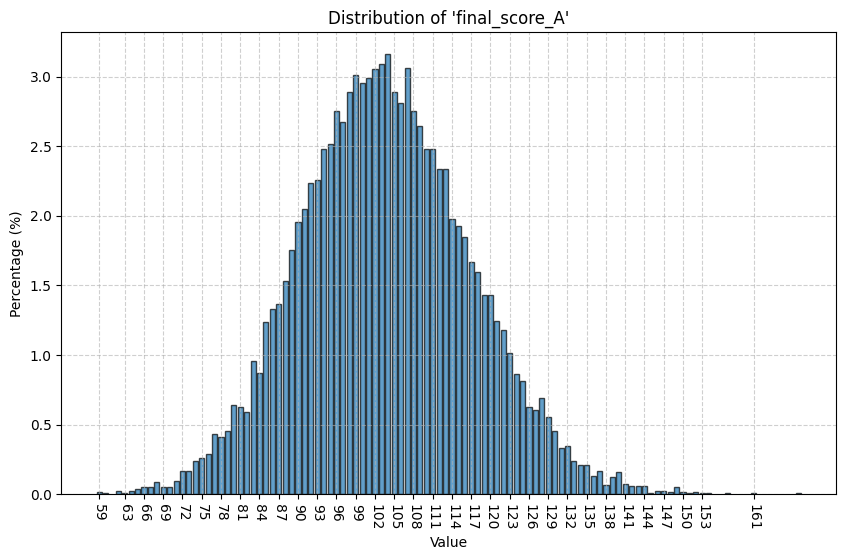

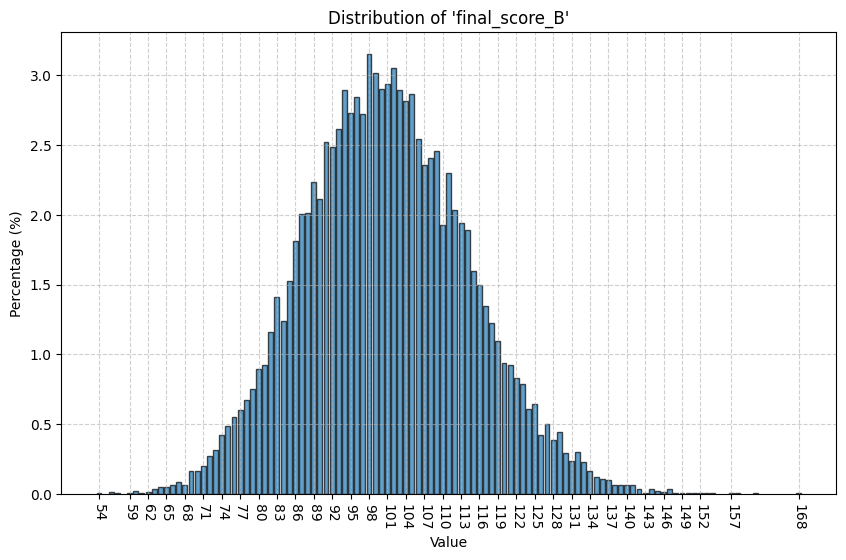

In [42]:
assess_dataset_balance(train_dataset, ["final_score_A", "final_score_B"], distribution_plot=True)

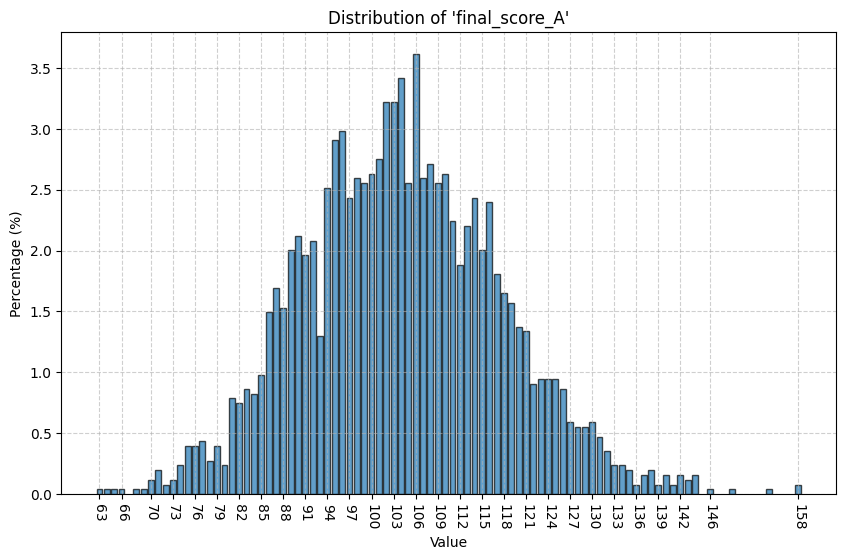

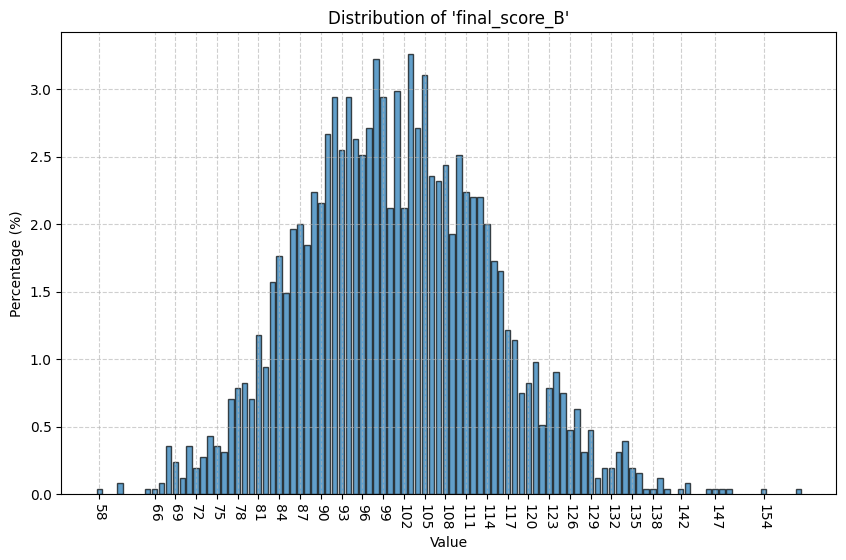

In [43]:
assess_dataset_balance(validation_dataset, ["final_score_A", "final_score_B"], distribution_plot=True)

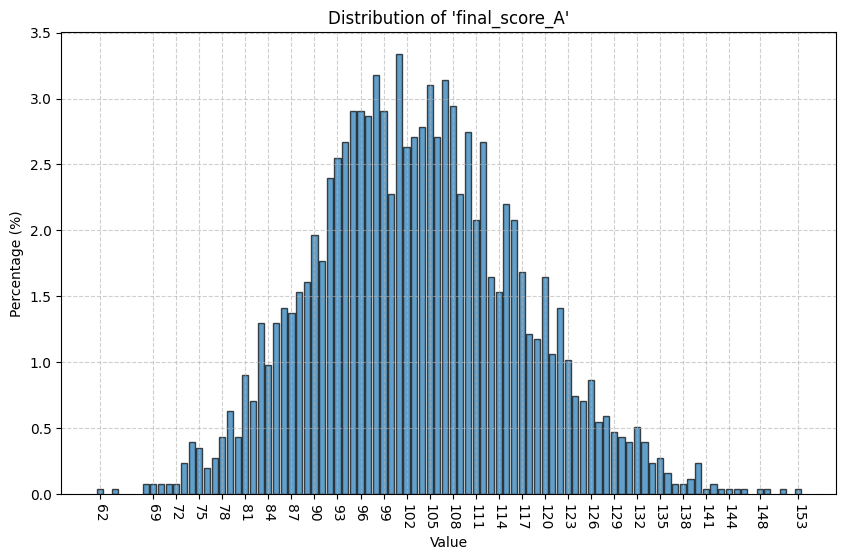

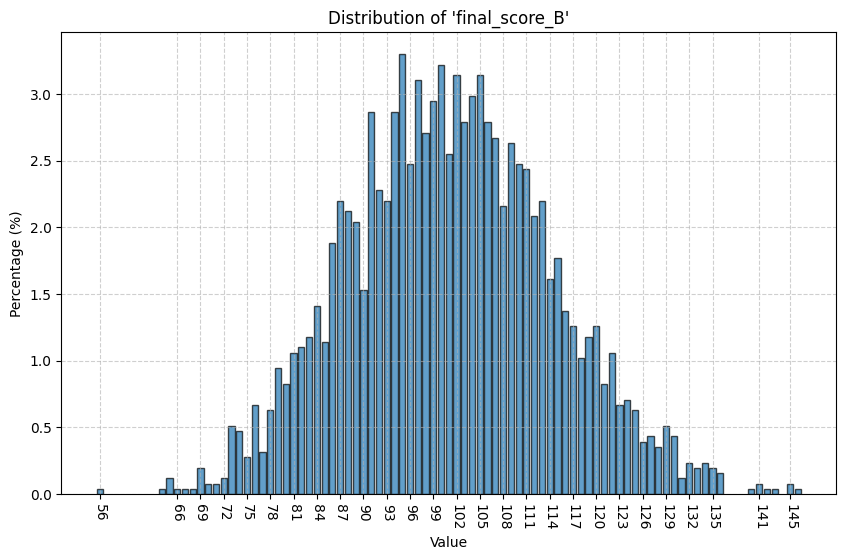

In [44]:
assess_dataset_balance(test_dataset, ["final_score_A", "final_score_B"], distribution_plot=True)

Preprocess Features

In [47]:
scaled_training_dataset, training_scaler = scale_features(train_dataset, exclude_columns=["final_score_A", "final_score_B"], return_scaler=True)
scaled_validation_dataset, val_scaler = scale_features(validation_dataset, exclude_columns=["final_score_A", "final_score_B"], return_scaler=True)
scaled_test_dataset, test_scaler = scale_features(test_dataset, exclude_columns=["final_score_A", "final_score_B"], return_scaler=True)

Save Scaled Datasets and Scalers

In [ ]:
# File path to save and load scaled train, test, and val datasets & scaler
scaled_train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [31]:
# Save scaled datasets and scaler
save_entity(scaled_train_test_val_folder_path, "scaled_train.pkl", scaled_training_dataset)
save_entity(scaled_train_test_val_folder_path, "train_scaler.pkl", training_scaler)

save_entity(scaled_train_test_val_folder_path, "scaled_val.pkl", scaled_validation_dataset)
save_entity(scaled_train_test_val_folder_path, "val_scaler.pkl", val_scaler)

save_entity(scaled_train_test_val_folder_path, "scaled_test.pkl", scaled_test_dataset)
save_entity(scaled_train_test_val_folder_path, "test_scaler.pkl", test_scaler)

In [11]:
# Load scaled datasets and scaler
scaled_training_dataset, training_scaler = load_entity(scaled_train_test_val_folder_path, "scaled_train.pkl"), load_entity(scaled_train_test_val_folder_path, "train_scaler.pkl")
scaled_validation_dataset, val_scaler = load_entity(scaled_train_test_val_folder_path, "scaled_val.pkl"), load_entity(scaled_train_test_val_folder_path, "val_scaler.pkl")
scaled_test_dataset, test_scaler = load_entity(scaled_train_test_val_folder_path, "scaled_test.pkl"), load_entity(scaled_train_test_val_folder_path, "test_scaler.pkl")